AMT5005MX Python Project AppleOrangeAI

Installs PIP necessary for code

In [ ]:
%pip install torch
%pip install torchvision
%pip install matplotlib
%pip install scikit-learn
%pip install tensorboard
%pip install tensorflow
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Necessary Pytorch Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

Adjustable Hyperparamaters

In [3]:
batch_size = 32 #- ‘batch_size’: Number of images processed at a time. A typical value is 32 or 64.
num_epochs = 10 #- ‘num_epochs’: Number of complete passes through the training dataset. Here we use 1 for demonstration, but in practice, you may use 10, 20, or more.
learning_rate = 0.001 #- ‘learning_rate’: The rate at which the model updates its weights during training.

Logging

In [4]:
import logging
import os

# Set up logging
logging.basicConfig(
    filename="log.log",
    filemode='w',  # Overwrite the log file for each run
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

logging.info("Program started now")

Data Preprocessing

In [5]:
data_transforms = {
 'train': transforms.Compose([
 transforms.Resize((224, 224)), #all images are resized to VVG16, fixing outliers and making the images optimal for VGG16
 transforms.RandomHorizontalFlip(), #Randomly flips the images horizontally, this effectively allows for more training and test material by doubling the number of available images (flipped and unflipped)
 transforms.ToTensor(),
 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #Normalizes the pixel values (mandatory for using my pre-trained model)
 ]),
 'val': transforms.Compose([
 transforms.Resize((224, 224)),
 transforms.ToTensor(),
 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
 ]),
}

Root/ Relative Paths

In [6]:
#Relative path based off the name of the files, change if renamed/moved
root_dir = './apple_orange'
train_root = root_dir + '/train'
val_root = root_dir + '/val'

In [7]:
#Loading the training and validation datasetts using 'ImageFolder' for later use
train_dataset = datasets.ImageFolder(root=train_root, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=val_root, transform=data_transforms['val'])

In [8]:
#creates data loaders to fectch data in batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
print(train_dataset.classes) #Print class names, should be ['apple', 'orange']

['apple', 'orange']


Loading Pretrained Model

In [9]:
#loads the Pre-Trained VGG16 Model
model = models.vgg16(pretrained=True)

c:\Users\Myles\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Myles\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


training images in the way they are passed as batches to the Neural Network during the training process.

torch.Size([32, 3, 224, 224])
torch.Size([32])
labels: tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1])


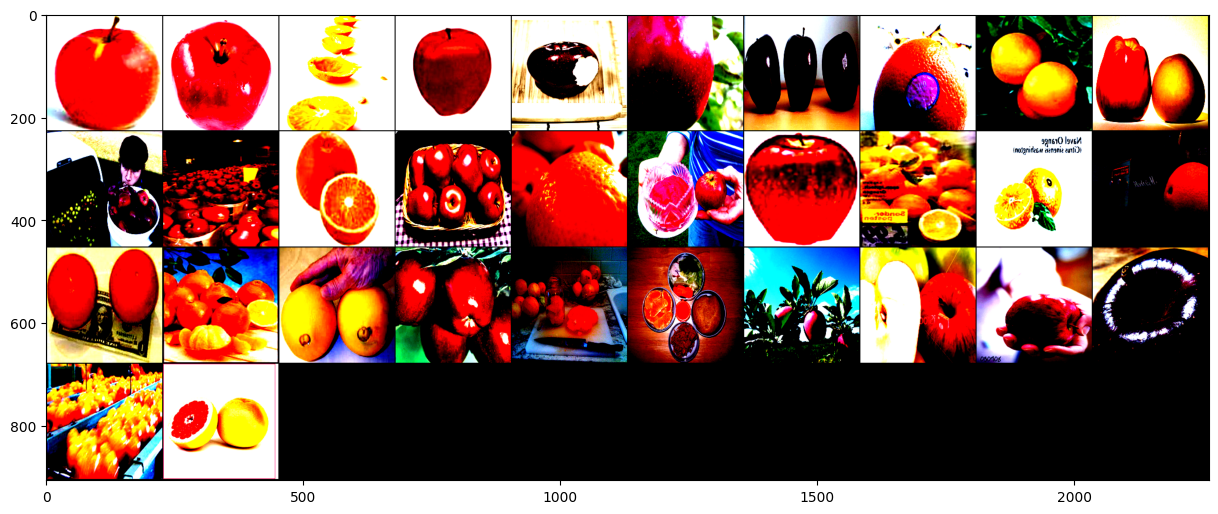

In [10]:
from matplotlib import pyplot as plt
import torchvision


batch = next(iter(train_loader))

images, labels = batch

print(images.shape)
print(labels.shape)
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels:', labels)

Model Adjustment

In [11]:
#Freezes unnecessary parts of the model to save resources
for param in model.features.parameters():
 param.requires_grad = False

In [12]:
#modifies the final layer to match the number of classes in our task
num_classes = 2 #set as 2 and not to be changed as we have 2 classes: apples and oranges
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

In [13]:
#creates a Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)

Model Finetuning (Takes a REALLY long time depending on number of epochs)

In [ ]:
num_epochs = 10 #defined earlier, can be changed to increase/decrease training time

In [15]:
import os
device = torch.device("cpu") #sets processing to CPU 
model.to(device)

epochList = [] #creates an array to store epoch losses

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    epochList.append(epoch_loss) #appends current epoch loss to the array to be used for graphing later

#saves the trained model
torch.save(model.state_dict(), 'vgg16_finetuned.pth')

Epoch 1/100, Loss: 0.6909
Epoch 2/100, Loss: 0.3538
Epoch 3/100, Loss: 0.4029
Epoch 4/100, Loss: 0.6564
Epoch 5/100, Loss: 0.2923
Epoch 6/100, Loss: 0.3510
Epoch 7/100, Loss: 0.4360
Epoch 8/100, Loss: 0.3303
Epoch 9/100, Loss: 1.2182
Epoch 10/100, Loss: 0.4201
Epoch 11/100, Loss: 0.3557
Epoch 12/100, Loss: 0.7897
Epoch 13/100, Loss: 0.9878
Epoch 14/100, Loss: 0.5821
Epoch 15/100, Loss: 0.4667
Epoch 16/100, Loss: 1.8248
Epoch 17/100, Loss: 0.2280
Epoch 18/100, Loss: 0.4166
Epoch 19/100, Loss: 0.5257
Epoch 20/100, Loss: 0.4087
Epoch 21/100, Loss: 0.4348
Epoch 22/100, Loss: 0.1111
Epoch 23/100, Loss: 0.1953
Epoch 24/100, Loss: 0.2105
Epoch 25/100, Loss: 0.0949
Epoch 26/100, Loss: 0.3461
Epoch 27/100, Loss: 0.0289
Epoch 28/100, Loss: 0.1009
Epoch 29/100, Loss: 0.0544
Epoch 30/100, Loss: 0.3600
Epoch 31/100, Loss: 0.2297
Epoch 32/100, Loss: 0.3698
Epoch 33/100, Loss: 0.4030
Epoch 34/100, Loss: 0.3480
Epoch 35/100, Loss: 0.2371
Epoch 36/100, Loss: 0.2495
Epoch 37/100, Loss: 0.3001
Epoch 38/1

Model Evaluation

In [58]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.9689


test model eval with guess and actual values

In [59]:
Guess = []
Actual = [] 




model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            Guess.append(predicted) 
            Actual.append(labels)

    val_accuracy = correct / total
    print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.9689


In [64]:
print(Guess[0])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [49]:
print(Actual)

[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       

Plots epoch loss overtime

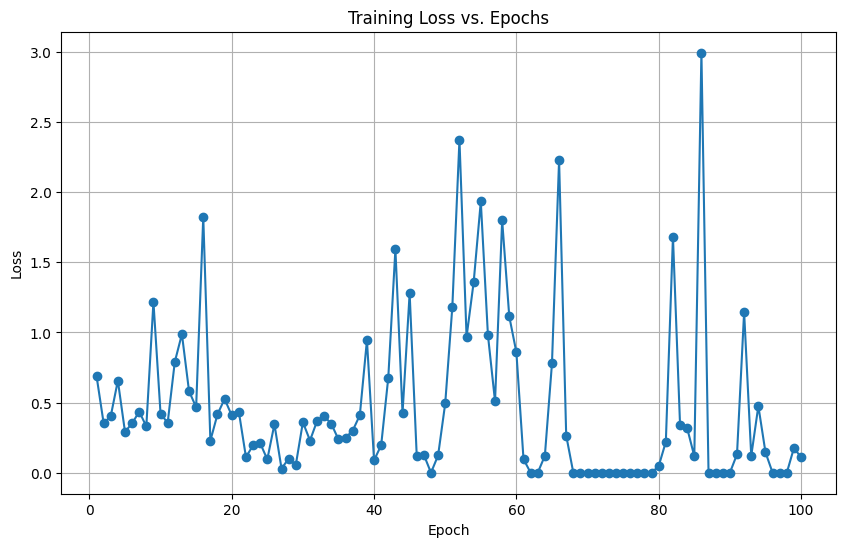

In [17]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epochList) + 1), epochList, marker='o')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Reading CSV files using Pandas

In [18]:
#imports pandas and prints the current pandas version
import pandas
import pandas as pd

In [20]:
TrueDomain = pd.read_csv('./apple_orange/metadata.csv', usecols=['domain'])
print(TrueDomain)

          domain
0     B (Orange)
1      A (Apple)
2      A (Apple)
3      A (Apple)
4      A (Apple)
...          ...
2523  B (Orange)
2524  B (Orange)
2525  B (Orange)
2526  B (Orange)
2527  B (Orange)

[2528 rows x 1 columns]


In [27]:
TrueDomain = pd.read_csv('./apple_orange/metadata.csv', usecols=['domain', 'split'])
TrueDomain = TrueDomain[TrueDomain['split'] == 'test'][['domain']]
print(TrueDomain)

          domain
0     B (Orange)
7     B (Orange)
13    B (Orange)
22    B (Orange)
23    B (Orange)
...          ...
2491  B (Orange)
2493  B (Orange)
2512  B (Orange)
2517  B (Orange)
2521  B (Orange)

[514 rows x 1 columns]


Test Confusion Matrix

Replace the y_true and y_pred values with the predicted labels and true labels from DataFrame

In [93]:
from sklearn.metrics import confusion_matrix



y_true=[0,0,1,1,0,1,1,0]  #Replace with true labels from the csv file
y_pred=[0,0,0,1,1,1,0,0]  #Replace with   predicted labels from the csv file

confusion_matrix(y_true,y_pred)

array([[3, 1],
       [2, 2]])

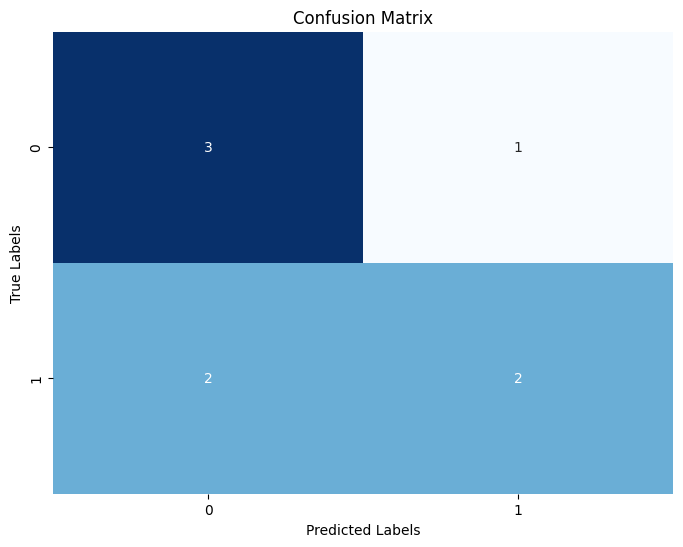

Accuracy: 0.6250
Precision: 0.6333
Recall: 0.6250
F1-score: 0.6190
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



In [94]:
import pandas as pd, numpy as np,  matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score




# Create a confusion matrix
cm = confusion_matrix(y_true,
                      y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Calculate accuracy
accuracy = accuracy_score(y_true,y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

# Create a classification report
report = classification_report(y_true, y_pred)
# Print classification report
print("Classification Report:\n", report)